In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#setting the pandas datafreame max columns so that we can see all the columns
pd.set_option('display.max_column',500)

#disabling the warnings 
warnings.filterwarnings('ignore')

### 1. Reading and Understanding the Data

In [3]:
# load data
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking data type of the columns
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

There are no missing value present in this data frame

In [5]:
car.shape

(205, 26)

In [6]:
# changing symboling data type to category
car['symboling'] = car['symboling'].astype('category')

In [7]:
# setting car_ID as index column
car.set_index('car_ID', inplace = True)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Creating a column with car company name
car['carcompany'] = car['CarName'].apply(lambda x: x.split()[0])

In [10]:
# dropping CarName column
car.drop('CarName', axis = 1, inplace = True)

In [11]:
#list of categorical column names
categorical = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
               'enginetype','cylindernumber','fuelsystem', 'carcompany']

In [12]:
# unique values in each categorical column
for col in categorical:
    print(col, end = " -> ")
    print(car[col].unique())

symboling -> [3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]
fueltype -> ['gas' 'diesel']
aspiration -> ['std' 'turbo']
doornumber -> ['two' 'four']
carbody -> ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel -> ['rwd' 'fwd' '4wd']
enginelocation -> ['front' 'rear']
enginetype -> ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber -> ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem -> ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
carcompany -> ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


There are few car company names are same with different spelling, so we need to change the name to one value. Ex: `maxda` and `mazda` are the same name with different spelling. We need to correct some spelling mistake.

In [13]:
#checking individual car counts
car['carcompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
renault         2
vw              2
mercury         1
porcshce        1
vokswagen       1
Nissan          1
toyouta         1
Name: carcompany, dtype: int64

In [14]:
#imputing the carcompany spelling mistake with single name
car.loc[car['carcompany'] == 'maxda',['carcompany']] = 'mazda'
car.loc[car['carcompany'] == 'Nissan', ['carcompany']] = 'nissan'
car.loc[car['carcompany'] == 'porcshce', ['carcompany']] = 'porsche'
car.loc[car['carcompany'] == 'toyouta', ['carcompany']] = 'toyota'
car.loc[car['carcompany'] == 'vokswagen', ['carcompany']] = 'volkswagen'
car.loc[car['carcompany'] == 'vw', ['carcompany']] = 'volkswagen'

### 2. Data Visualisation

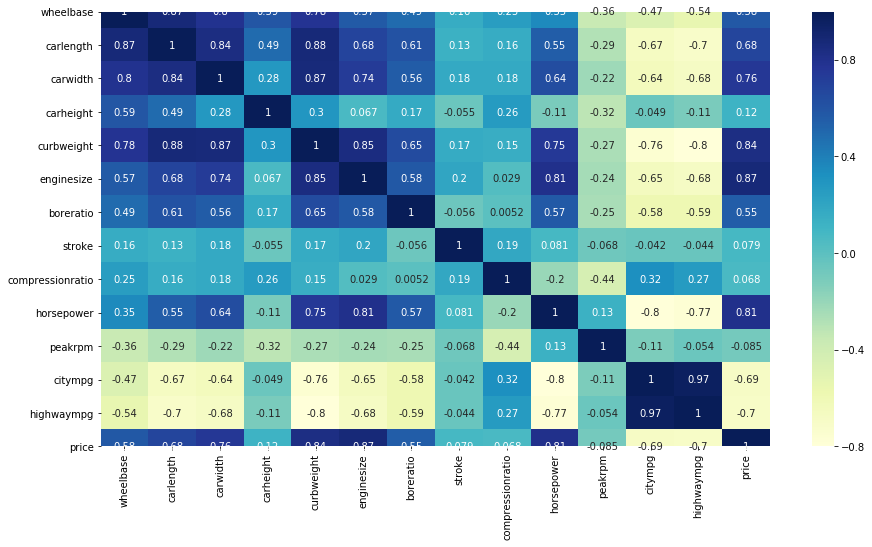

In [15]:
# Plotting heatmap to findout the correllations
plt.figure(figsize = (15,8))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

`Price` is correlated with `engine size`, `horsepower`, `curb weight`, `car width`, `car length`, `wheel base`, `bore ratio`. 
`city mpg` and `highway mpg` are negatively correlated.

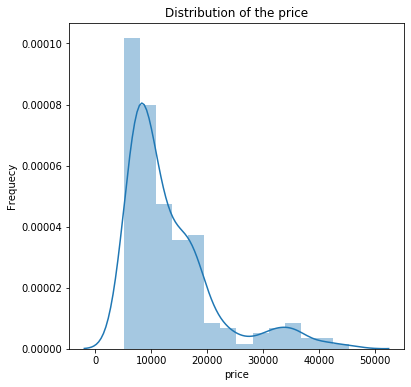

In [16]:
# plotting the distribution of price
plt.figure(figsize = (6,6))
ax = sns.distplot(car['price'])
plt.title('Distribution of the price')
ax.set(xlabel='price', ylabel='Frequecy')
plt.show()

Cars are mostly within 5000 to 20000 price range.

#### Visualising Numeric Variables

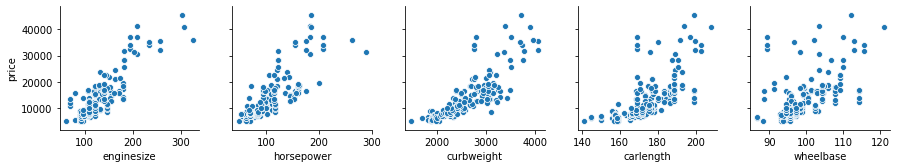

In [17]:
sns.pairplot(x_vars = ['enginesize', 'horsepower', 'curbweight', 'carlength', 'wheelbase'], y_vars = ['price'], data = car)
plt.show()

We can see `engine size` is highly correlated with the price. We can see some linearity between enginesize and price, horsepower, curbweight

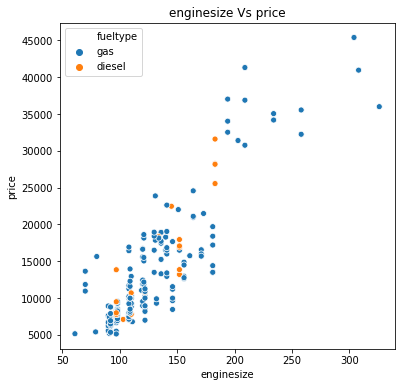

In [18]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'enginesize', y = 'price', hue='fueltype', data = car)
plt.title("enginesize Vs price")
plt.show()

There is a positive correlation between price and enginesize. Number of gas car is spearding across the price range where as diesel cars are between 6000 to 35000.

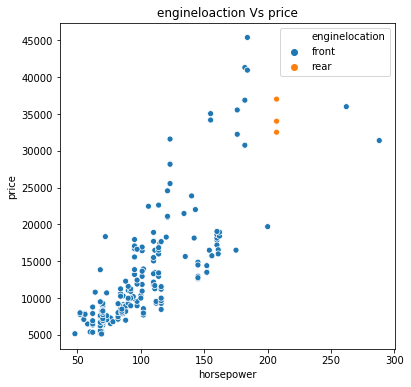

In [19]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'horsepower', y = 'price', hue='enginelocation', data = car)
plt.title("engineloaction Vs price")
plt.show()

We can some cluster between range 5000 to 20000 price. Only 200 horsepower cars has enginelocation in the rear. Most of the car are below 150 horspower.

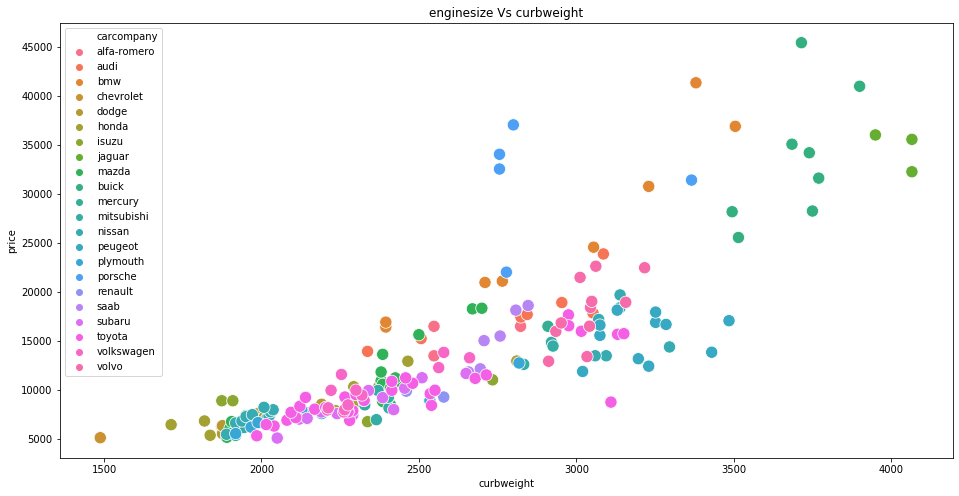

In [20]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'curbweight', y = 'price', hue='carcompany', data = car, s=150)
plt.title("enginesize Vs curbweight")
plt.show()

Curbweight has positive correlation with price. We can see around 2000 curbweight there is not much price variance. Above 2500 curbweight. Porsche has price range of 20000 - 40000 and curb weight ranging from 2700 to 3400. We can see some outliers are there from jaguar cars. Nissan has huge range of curbweight.

#### Visualising Categorical Variables

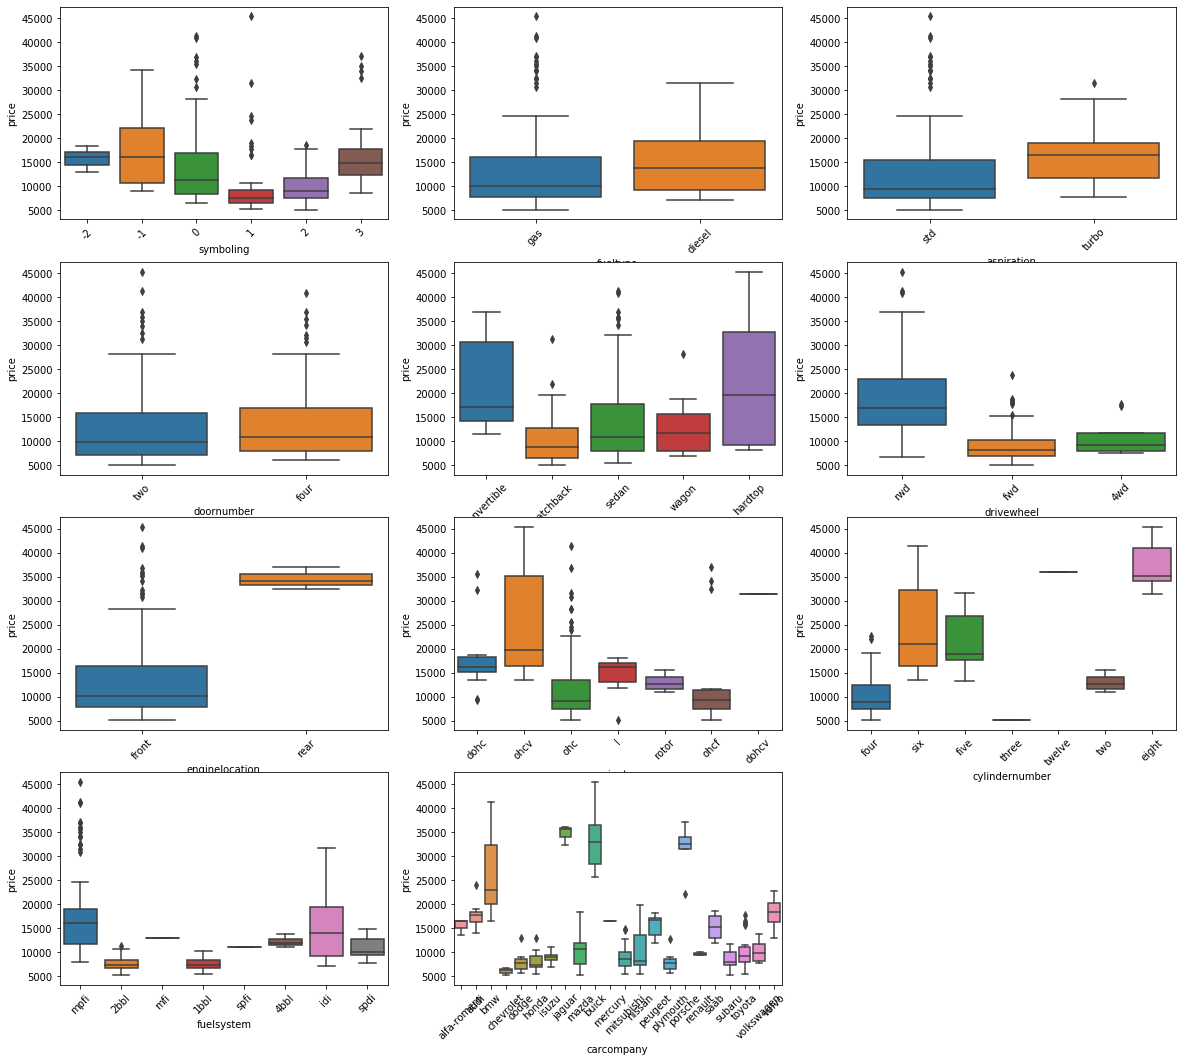

In [21]:
plt.figure(figsize=(20, 18))
for i, c in enumerate(categorical):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = c, y = 'price', data = car)
    plt.xticks(rotation = 45)
plt.show()

- Symboling -1 has long spread with meadian around 15000 price.
- Diesel car's price is little high. But gas car has very high priced car. We can see some outliers in gas car.
- Cars with turbo had meadian around 15000 price range.
- We dont see much difference in price of the doornumber variant. 
- Hardtop cars have very long spread in price.
- rwd driveweel has huge price range.
- Most of the cars has enginelocation in the front and price can vary from 5000 to 45000. Very small number of cars have engine location in the rear but these ares are costly.
- mpfi fuel system cars have very large outliers in terms of price.

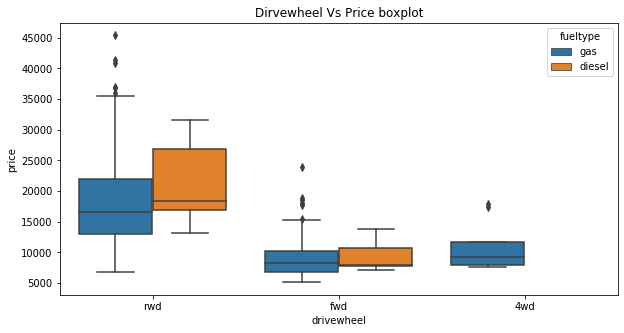

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drivewheel', y = 'price', hue = 'fueltype', data = car)
plt.title('Dirvewheel Vs Price boxplot')
plt.show()

- Gas cars has huge range in price.
- We can see outliers in terms of price.
- rwd gas cars are ranging from 6000 to 45000.
- There are no diesel car present with 4wd.

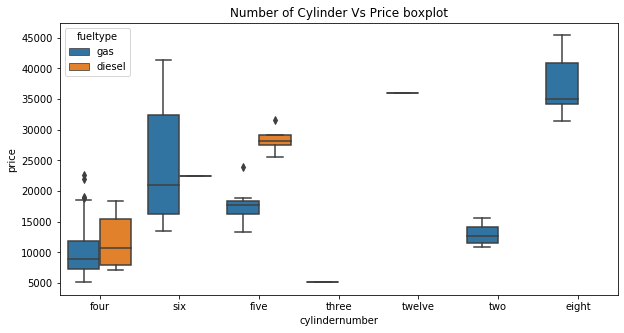

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = car)
plt.title('Number of Cylinder Vs Price boxplot')
plt.show()

- Gas car with six cylinder has huge price range.
- Gas car with eight cylinder costly.
- Four cylinder gas/diesel cars has almost same high price range.
- Five cylinder diesel cars are costly than gas variant.

### 3. Data Preperation

In [24]:
# creating dummy variables with all the categorical columns. This data frame has no Yes/No column
dummies = pd.get_dummies(car[categorical], drop_first = True)

In [25]:
# joining the dummy variables with the data frame
car = pd.concat([car, dummies], axis = 1)

#dropping all the categorical columns
car = car.drop(categorical, axis = 1)
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
car.shape

(205, 69)

### 4: Splitting the Data into Training and Testing Sets

In [27]:
# Splitting the data set into train and test data
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Rescaling using MinMax 

In [28]:
scaler = MinMaxScaler()

In [29]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
# fitting and transforming the data using min/max scaler
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.305556,0.351351,0.243998,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.472222,0.540541,0.057463,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.333333,0.405405,0.093406,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
33,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.694444,0.675676,0.007763,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.388889,0.459459,0.105838,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 5. Buidling model with train data set

#### Dividing X and Y for model building

In [30]:
y_train = df_train.pop('price')
X_train = df_train

In [31]:
# performing linear regression using LinearRegression class
lm = LinearRegression()
lm.fit(X_train, y_train)

# using RFE to identify 15 variables for analysis
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 24),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 33),
 ('horsepower', False, 40),
 ('peakrpm', False, 17),
 ('citympg', False, 45),
 ('highwaympg', False, 22),
 ('symboling_-1', False, 6),
 ('symboling_0', False, 5),
 ('symboling_1', False, 3),
 ('symboling_2', False, 2),
 ('symboling_3', False, 4),
 ('fueltype_gas', False, 35),
 ('aspiration_turbo', False, 30),
 ('doornumber_two', False, 48),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 29),
 ('carbody_wagon', False, 28),
 ('drivewheel_fwd', False, 52),
 ('drivewheel_rwd', False, 41),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 9),
 ('enginetype_l', False, 8),
 ('enginetype_ohc', False, 39),
 ('enginetype_ohcf', False, 14),
 ('enginetype_ohcv', False, 44),
 ('enginetype_rotor', True, 1)

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carcompany_bmw', 'carcompany_porsche',
       'carcompany_volvo'],
      dtype='object')

#### Building model with statsmodel

In [34]:
X_train_rfe = X_train[col]
# adding constant to the X_train_rfe data frame
X_train_sm = sm.add_constant(X_train_rfe)

In [35]:
# performing Ordinary Least Squared using statsmodel library
lm = sm.OLS(y_train,X_train_sm).fit() 

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.08e-83
Time:                        17:08:56   Log-Likelihood:                 251.29
No. Observations:                 164   AIC:                            -472.6
Df Residuals:                     149   BIC:                            -426.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [37]:
#  Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,79.23
1,curbweight,45.06
0,carwidth,38.77
3,boreratio,37.45
4,stroke,34.34
8,cylindernumber_four,28.66
7,cylindernumber_five,2.89
10,cylindernumber_twelve,2.73


#### Model 2: 
- Dropping `enginetype_rotor` as the VIF is infinite.
- All the variables are significant though.

In [38]:
# dropping enginetype_rotor
X_train_rfe.drop('enginetype_rotor', axis = 1, inplace = True)
# adding constant
X_train_sm = sm.add_constant(X_train_rfe)
#performing OLS
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.08e-83
Time:                        17:08:57   Log-Likelihood:                 251.29
No. Observations:                 164   AIC:                            -472.6
Df Residuals:                     149   BIC:                            -426.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [39]:
# calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,79.23
1,curbweight,45.06
0,carwidth,38.77
3,boreratio,37.45
4,stroke,34.34
7,cylindernumber_four,28.66
10,cylindernumber_two,3.87
6,cylindernumber_five,2.89
9,cylindernumber_twelve,2.73
12,carcompany_porsche,2.59


#### Model 3
- Dropping `cylindernumber_four` as the VIF is 28.66
- All the p-vales are 0

In [40]:
X_train_rfe.drop('cylindernumber_four', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.83e-77
Time:                        17:08:57   Log-Likelihood:                 233.49
No. Observations:                 164   AIC:                            -439.0
Df Residuals:                     150   BIC:                            -395.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,45.05
0,carwidth,35.99
2,enginesize,27.81
3,boreratio,11.64
4,stroke,8.48
11,carcompany_porsche,2.45
5,enginelocation_rear,2.26
8,cylindernumber_twelve,1.63
6,cylindernumber_five,1.56
9,cylindernumber_two,1.29


#### Model 4
- Dropping `cylindernumber_twelve` as p-value is 10.2%

In [42]:
X_train_rfe.drop('cylindernumber_twelve', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.46e-77
Time:                        17:08:57   Log-Likelihood:                 232.02
No. Observations:                 164   AIC:                            -438.0
Df Residuals:                     151   BIC:                            -397.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0904 

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.07
0,carwidth,35.58
2,enginesize,19.57
3,boreratio,11.54
4,stroke,7.73
10,carcompany_porsche,2.39
5,enginelocation_rear,2.25
6,cylindernumber_five,1.55
8,cylindernumber_two,1.22
11,carcompany_volvo,1.18


#### Model 5
- Dropping `curbweight` as the VIF is 41.07
- All the p-values are small

In [44]:
X_train_rfe.drop('curbweight', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     143.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.10e-74
Time:                        17:08:57   Log-Likelihood:                 221.34
No. Observations:                 164   AIC:                            -418.7
Df Residuals:                     152   BIC:                            -381.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1069 

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.92
2,boreratio,10.89
1,enginesize,10.48
3,stroke,7.61
9,carcompany_porsche,2.28
4,enginelocation_rear,2.25
5,cylindernumber_five,1.54
7,cylindernumber_two,1.17
10,carcompany_volvo,1.17
8,carcompany_bmw,1.14


#### Model 6
- Dropping `carwidth` as VIF is 26.92
- p-values are small

In [46]:
X_train_rfe.drop('carwidth', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.40e-66
Time:                        17:08:58   Log-Likelihood:                 199.16
No. Observations:                 164   AIC:                            -376.3
Df Residuals:                     153   BIC:                            -342.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0447 

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,8.08
0,enginesize,6.94
2,stroke,5.44
8,carcompany_porsche,2.22
3,enginelocation_rear,2.02
4,cylindernumber_five,1.14
7,carcompany_bmw,1.14
6,cylindernumber_two,1.12
9,carcompany_volvo,1.12
5,cylindernumber_three,1.01


#### Model 7
- Dropping `boreratio` as the p-value is 45.8% and the VIF is 8.08

In [48]:
X_train_rfe.drop('boreratio', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.56e-67
Time:                        17:08:58   Log-Likelihood:                 198.86
No. Observations:                 164   AIC:                            -377.7
Df Residuals:                     154   BIC:                            -346.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0579 

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.71
1,stroke,4.10
7,carcompany_porsche,2.12
2,enginelocation_rear,2.01
6,carcompany_bmw,1.14
3,cylindernumber_five,1.12
5,cylindernumber_two,1.07
8,carcompany_volvo,1.07
4,cylindernumber_three,1.01


#### Model 8
- Dropping `cylindernumber_three` as the p-value is 28.7%

In [50]:
X_train_rfe.drop('cylindernumber_three', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.18e-68
Time:                        17:08:58   Log-Likelihood:                 198.26
No. Observations:                 164   AIC:                            -378.5
Df Residuals:                     155   BIC:                            -350.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0554    

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.66
1,stroke,4.04
6,carcompany_porsche,2.12
2,enginelocation_rear,2.01
5,carcompany_bmw,1.14
3,cylindernumber_five,1.12
4,cylindernumber_two,1.07
7,carcompany_volvo,1.07


#### Model 9
- Dropping `stroke` as the p-value is 20.1% and VIF is 4.66

In [52]:
X_train_rfe.drop('stroke', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.67e-69
Time:                        17:08:59   Log-Likelihood:                 197.39
No. Observations:                 164   AIC:                            -378.8
Df Residuals:                     156   BIC:                            -354.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0802    

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carcompany_porsche,2.08
1,enginelocation_rear,2.00
0,enginesize,1.39
2,cylindernumber_five,1.12
4,carcompany_bmw,1.11
6,carcompany_volvo,1.07
3,cylindernumber_two,1.00


#### Stopping iteration as all the p-values are small and VIFs are less than 2. Also, the model's R-square is 88.2% and the adjusted R-square is 87.7%. F-statistic is 167 which is good and all the betas are significant.

### 6. Residual Analysis

In [54]:
# predicting price using train data set
y_train_pred = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

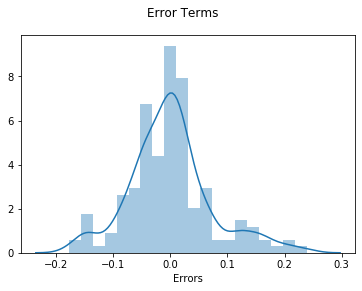

In [55]:
# plotting the residual (y-y_pred)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors') 

#### Error terms are almost normally distributed with mean 0. This is respecting the assumption of the linear regression.

### 7. Making predictions

In [56]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# scaling the test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [57]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.0,41.0,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.477544,0.599207,0.517683,0.536992,0.476215,0.297561,0.618467,0.521803,0.170579,0.284959,0.388253,0.286585,0.315096,0.282376,0.146341,0.317073,0.146341,0.219512,0.146341,0.926829,0.219512,0.463415,0.097561,0.341463,0.463415,0.073171,0.414634,0.560976,0.024390,0.0,0.073171,0.731707,0.048780,0.097561,0.0,0.024390,0.829268,0.097561,0.0,0.0,0.0,0.195122,0.0,0.073171,0.0,0.634146,0.048780,0.024390,0.0,0.048780,0.073171,0.0,0.0,0.048780,0.024390,0.0,0.073171,0.024390,0.048780,0.073171,0.073171,0.048780,0.024390,0.0,0.073171,0.024390,0.195122,0.024390,0.121951
std,0.237096,0.202206,0.166533,0.190905,0.190466,0.180215,0.229504,0.177540,0.216386,0.159654,0.206137,0.156943,0.168417,0.245496,0.357839,0.471117,0.357839,0.419058,0.357839,0.263652,0.419058,0.504854,0.300406,0.480091,0.504854,0.263652,0.498779,0.502433,0.156174,0.0,0.263652,0.448575,0.218085,0.300406,0.0,0.156174,0.380949,0.300406,0.0,0.0,0.0,0.401218,0.0,0.263652,0.0,0.487652,0.218085,0.156174,0.0,0.218085,0.263652,0.0,0.0,0.218085,0.156174,0.0,0.263652,0.156174,0.218085,0.263652,0.263652,0.218085,0.156174,0.0,0.263652,0.156174,0.401218,0.156174,0.331295
min,0.000000,0.056911,0.291667,0.158333,0.128394,0.109434,-0.111111,-0.060606,0.000000,0.083333,0.000000,0.027778,-0.027027,0.012542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320690,0.497561,0.408333,0.400000,0.347944,0.184906,0.468254,0.469697,0.100000,0.154167,0.265306,0.166667,0.216216,0.105810,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.431034,0.570732,0.516667,0.59

In [58]:
# Splitting X and Y data set
y_test = df_test.pop('price')
X_test = df_test

In [59]:
# Adding constant variable to test dataframe
X_test_model = sm.add_constant(X_test)

In [60]:
# Subsetting the X_test data frame 
X_test_model = X_test_model[X_train_sm.columns]

In [61]:
# predicting with the test data
y_pred = lm.predict(X_test_model)

### 8. Model evaluation

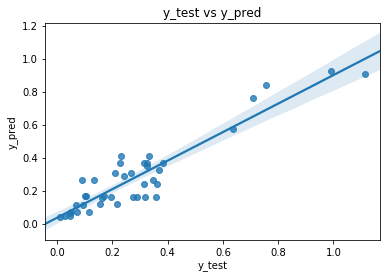

In [62]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(y_test, y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')   
plt.show()

In [63]:
# Calculating R square of the test 
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print("R-square on test data : {0}".format(r2))

R-square on test data : 0.8639430458626182


In [64]:
y_train_pred = lm.predict(X_train_sm)

In [65]:
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print("R-square on train data : {0}".format(r2))

R-square on train data : 0.8824897775394807


We can see that the equation of our best fitted line is:

$ price = 1.0788  \times  enginesize + 0.1744  \times  enginelocation rear + 0.1597 \times cylindernumber five + 0.2517 \times cylindernumber two + 0.2390 \times carcompany bmw + 0.2045 \times carcompany porsche + 0.1232 \times carcompany volvo $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (enginesize/carwidth, horsepower/stroke, etc.)
2. Build a non-linear model